sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object


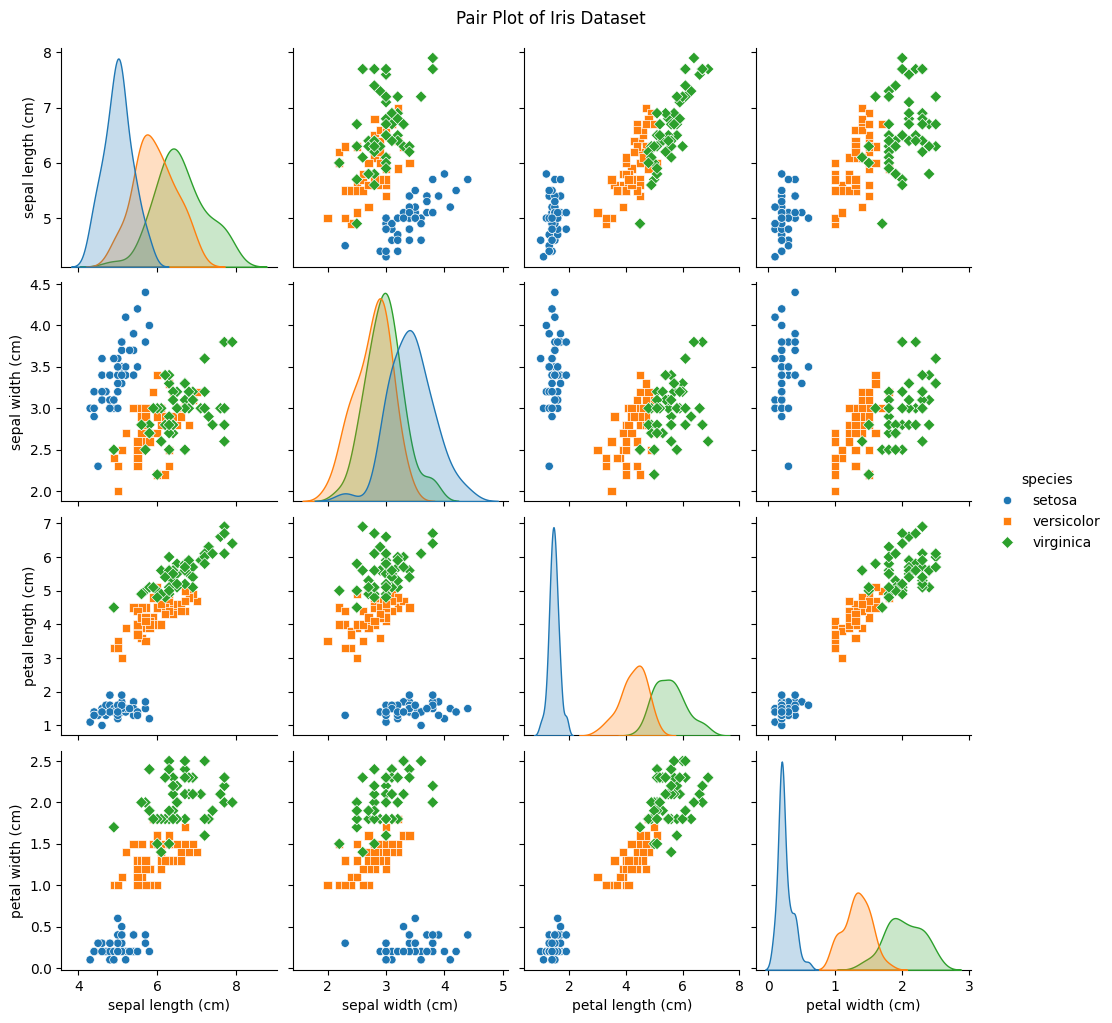

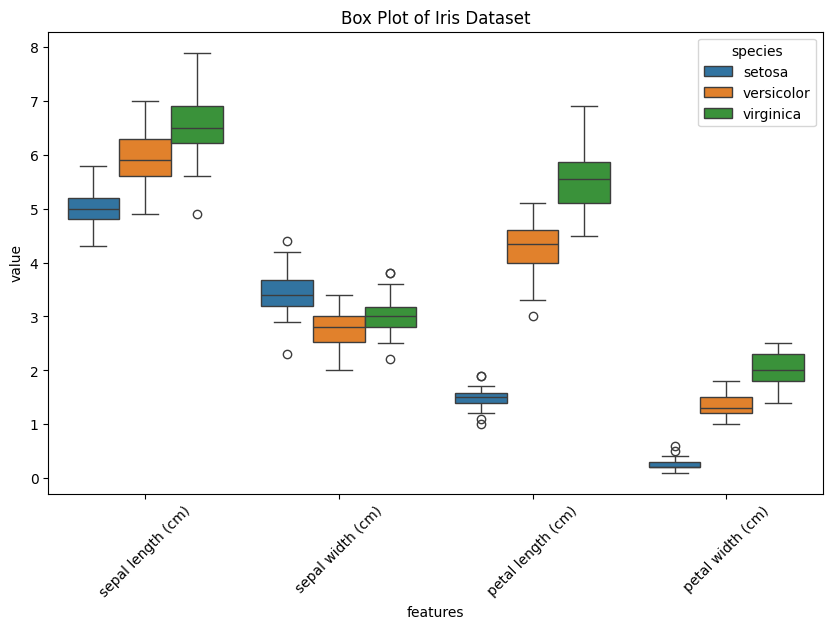

In [5]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Introduce missing values
np.random.seed(0)
missing_rate = 0.1
n_missing_samples = int(np.floor(missing_rate * iris_df.size))

missing_samples = np.random.choice(iris_df.size, n_missing_samples, replace=False)
iris_df.values.ravel()[missing_samples] = np.nan

# Handle missing values by imputing with the mean of each numeric column
numeric_cols = iris_df.select_dtypes(include=[np.number]).columns
iris_df[numeric_cols] = iris_df[numeric_cols].apply(lambda col: col.fillna(col.mean()), axis=0)

# Verify data types
print(iris_df.dtypes)

# Scatter plot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
iris_melted = pd.melt(iris_df, id_vars='species', var_name='features', value_name='value')
sns.boxplot(x='features', y='value', hue='species', data=iris_melted)
plt.title('Box Plot of Iris Dataset')
plt.xticks(rotation=45)
plt.show()